In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

news_df = pd.read_csv('fake_or_real_news.csv')
news_df.head()


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
def get_average_word_count(df, column_name):

  df['word_count'] = df[column_name].str.split().str.len()
  average_word_count = df['word_count'].mean()
  return average_word_count


avg_title_word_count = get_average_word_count(news_df, "title")
print(f"The average word count in the 'title' column is: {avg_title_word_count}")


The average word count in the 'title' column is: 10.496448303078138


Average title length is roughly 10.5 words. Now, can seperate into longer or shorter column then get percentage of real or fake

In [6]:


news_df['avg_title_lable'] = np.where(news_df['word_count'] > 10.5,
                                      'Longer', 'Shorter')

In [7]:
news_df.head()

,Unnamed: 0,title,text,label,word_count,avg_title_lable
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,5,Shorter
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,14,Longer
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,9,Shorter
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,15,Longer
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,9,Shorter


Text(0.5, 1.0, 'Average Title Label vs. News Label')

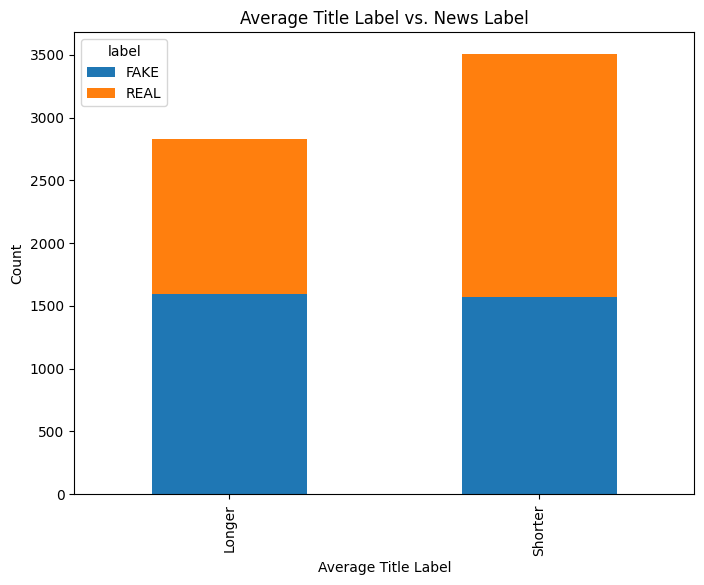

In [13]:
title_label_counts = news_df.groupby(['avg_title_lable', 'label'])['label'].count().unstack()

title_label_counts.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.xlabel('Average Title Label')
plt.ylabel('Count')
plt.title('Average Title Label vs. News Label')

We can see a pretty even split, but a larger number of titles that were shorter than average (10.5) were labeled as being real. Not sure how relevant this one is.. Would be nice to add the stacked percentaged as well to the graph.


In [15]:

news_df['exclamation_count'] = news_df["title"].str.count('!')
news_df.head()

,Unnamed: 0,title,text,label,word_count,avg_title_lable,exclamation_count
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,5,Shorter,0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,14,Longer,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,9,Shorter,0
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,15,Longer,1
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,9,Shorter,0


Text(0.5, 1.0, 'Exclamation Point Count in Title vs. News Label')

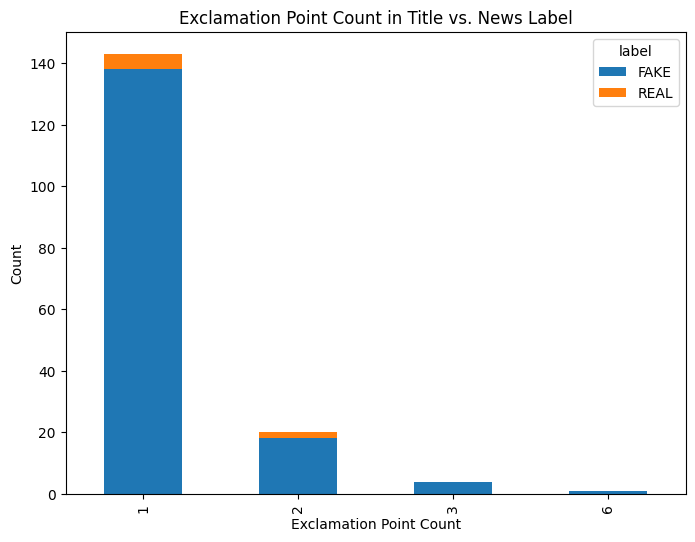

In [25]:

#Getting a dataframe that only has instances with an exlamation point in the title
exclamation_title_df = news_df[news_df['exclamation_count']>0]



title_label_counts = exclamation_title_df.groupby(['exclamation_count', 'label'])['label'].count().unstack()

title_label_counts.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.xlabel('Exclamation Point Count')
plt.ylabel('Count')
plt.title('Exclamation Point Count vs. News Label')
plt.xlabel('Exclamation Point Count')
plt.ylabel('Count')
plt.title('Exclamation Point Count in Title vs. News Label')

The graph above is super interesting!!! Shows that essentally any title with an exclamation point is fake, which is what we thought at first. Would also be nice to get percentages here.

Text(0.5, 1.0, 'Exclamation Point Count in Text vs. News Label')

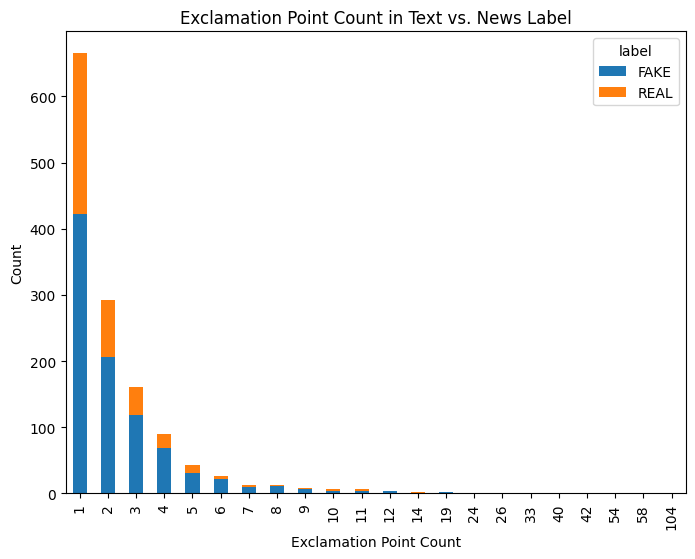

In [26]:
#Getting a dataframe that only has instances with an exlamation point in the text
news_df['exclamation_count_text'] = news_df["text"].str.count('!')
news_df.head()


exclamation_title_df = news_df[news_df['exclamation_count_text']>0]



title_label_counts = exclamation_title_df.groupby(['exclamation_count_text', 'label'])['label'].count().unstack()

title_label_counts.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.xlabel('Exclamation Point Count')
plt.ylabel('Count')
plt.title('Exclamation Point Count vs. News Label')
plt.xlabel('Exclamation Point Count')
plt.ylabel('Count')
plt.title('Exclamation Point Count in Text vs. News Label')